In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict.csv')
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [29]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [30]:
df.drop(columns=["Serial No."], inplace=True)

In [31]:
df.fillna(df.mean(), inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [32]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [33]:
cutoff = df["Chance of Admit"].quantile(0.75)
df["Admit_Class"] = np.where(df["Chance of Admit"] >= cutoff, 1, 0)
print("Cutoff value used:", cutoff)


Cutoff value used: 0.83


In [34]:
X = df.drop(["Chance of Admit", "Admit_Class"], axis=1)
y = df["Admit_Class"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=20)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

print("Gini Accuracy:", accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))



Gini Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        62
           1       0.72      0.72      0.72        18

    accuracy                           0.88        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.88      0.88      0.88        80



In [38]:
dt_entropy = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

dt_entropy.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)

print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

Entropy Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.79      0.83      0.81        18

    accuracy                           0.91        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.91      0.91      0.91        80



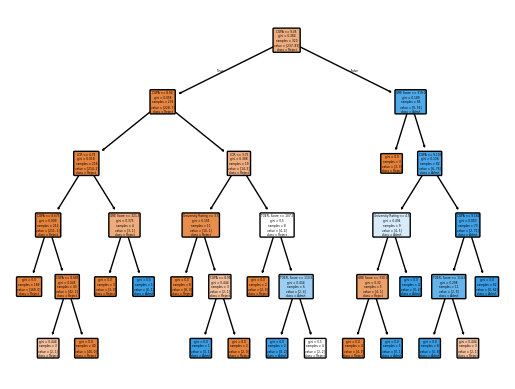

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plot_tree(
    dt_gini,
    feature_names=X.columns,
    class_names=["Reject","Admit"],
    filled=True,
    rounded=True,
)
plt.show()

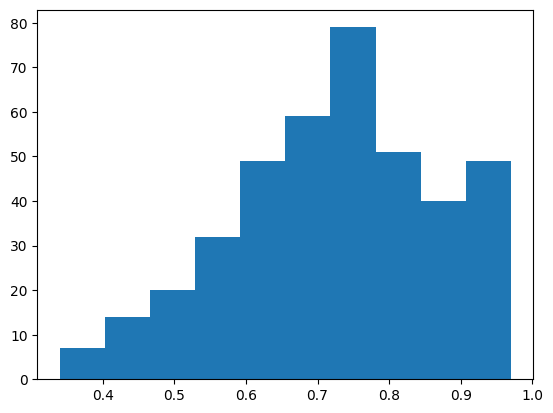

In [14]:
plt.hist(df["Chance of Admit"],bins=10)
plt.show()


In [ ]:
plt.scatter(df["GRE Score"], df["